In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 01. FISH Dataset

In [2]:
df = pd.read_csv("Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape

(159, 7)

In [5]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
0.5%,4.661000,8.922000,9.506000,10.380000,1.736616,1.127232
1%,6.364000,9.706000,10.206000,11.264000,1.874056,1.148400
5%,9.800000,11.300000,11.800000,13.100000,2.203560,1.283140
10%,29.580000,13.440000,14.620000,16.160000,3.764800,2.227840
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500


In [9]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [10]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [11]:
df.isin([0]).any()

Species    False
Weight      True
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [12]:
df['Weight'].isin([0]).value_counts()

False    158
True       1
Name: Weight, dtype: int64

In [13]:
df.loc[df['Weight'].isin([0])]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


#### Dropping 1 '0' value in Weight attribute

In [14]:
mask1 = df.loc[df['Weight'].isin([0])]
df.drop(mask1.index, axis = 0, inplace = True)

In [15]:
df.shape

(158, 7)

### outliers using std dev

In [16]:
from scipy import stats

z_scores = stats.zscore(df.drop('Species', axis = 1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

3 outliers found. But not removed. Removing later.

In [17]:
df_new.shape

(155, 7)

In [18]:
# df = df_new

#### Train - Test Split

In [19]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Width'}>]], dtype=object)

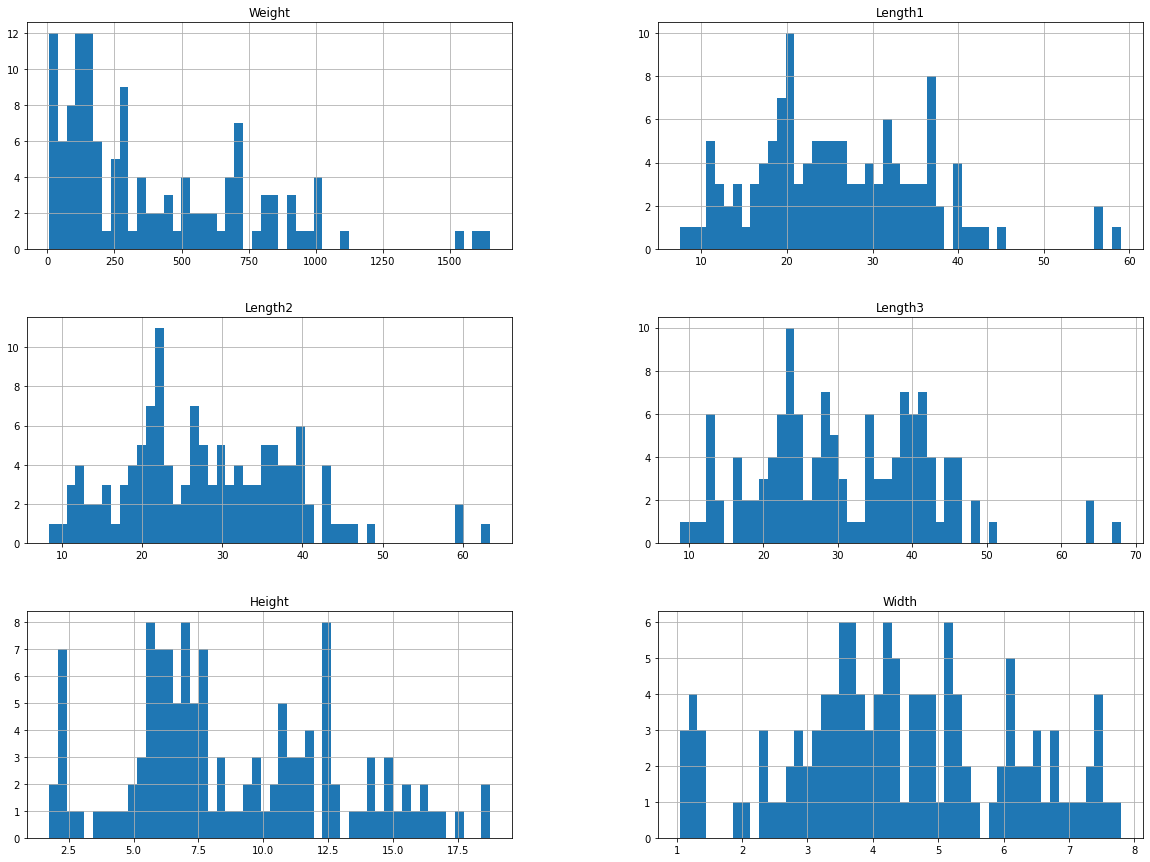

In [20]:
df_train.hist(bins = 50, figsize = (20, 15))

<AxesSubplot:>

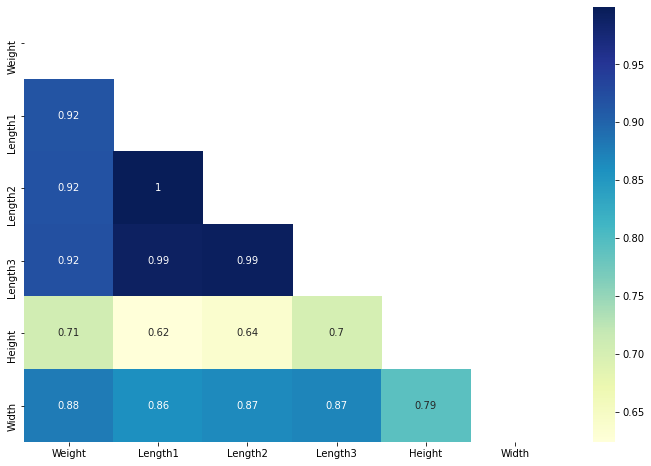

In [21]:
corr_mat = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, mask = np.triu(corr_mat), cmap="YlGnBu", annot = True)

#### Length1 is highly correlated to Length2 and Length3 indicating multi-collinearity. We will thus use just Length1 out of the 3 as our feature variable

In [22]:
target = 'Weight'
features = ['Length1', 'Height', 'Width', 'Species']

In [23]:
df_train['Species'].value_counts()

Perch        46
Bream        26
Roach        17
Pike         13
Smelt        10
Parkki        9
Whitefish     5
Name: Species, dtype: int64

#### Species wise distribution of numerical attributes

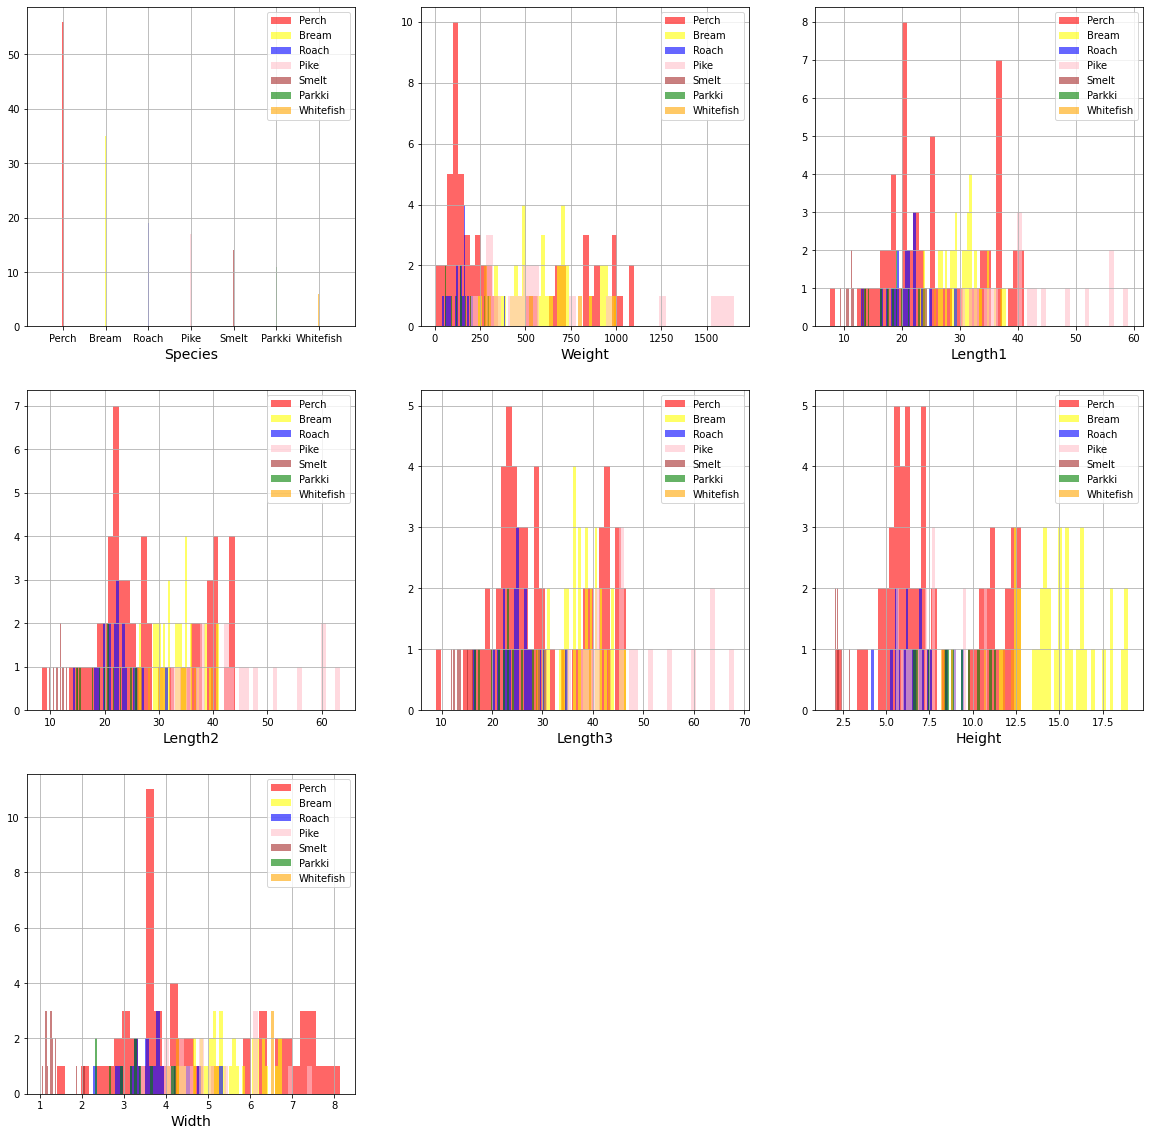

In [24]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df_train, 1):
    plt.subplot(3, 3, i)
    df[df['Species'] == 'Perch'][column].hist(bins=35, color='red', label='Perch', alpha=0.6)
    df[df['Species'] == 'Bream'][column].hist(bins=35, color='yellow', label='Bream', alpha=0.6)
    df[df['Species'] == 'Roach'][column].hist(bins=35, color='blue', label='Roach', alpha=0.6)
    df[df['Species'] == 'Pike'][column].hist(bins=35, color='pink', label='Pike', alpha=0.6)
    df[df['Species'] == 'Smelt'][column].hist(bins=35, color='brown', label='Smelt', alpha=0.6)
    df[df['Species'] == 'Parkki'][column].hist(bins=35, color='green', label='Parkki', alpha=0.6)
    df[df['Species'] == 'Whitefish'][column].hist(bins=35, color='orange', label='Whitefish', alpha=0.6)
    plt.legend()
    plt.xlabel(column, fontsize = 14)
    print()

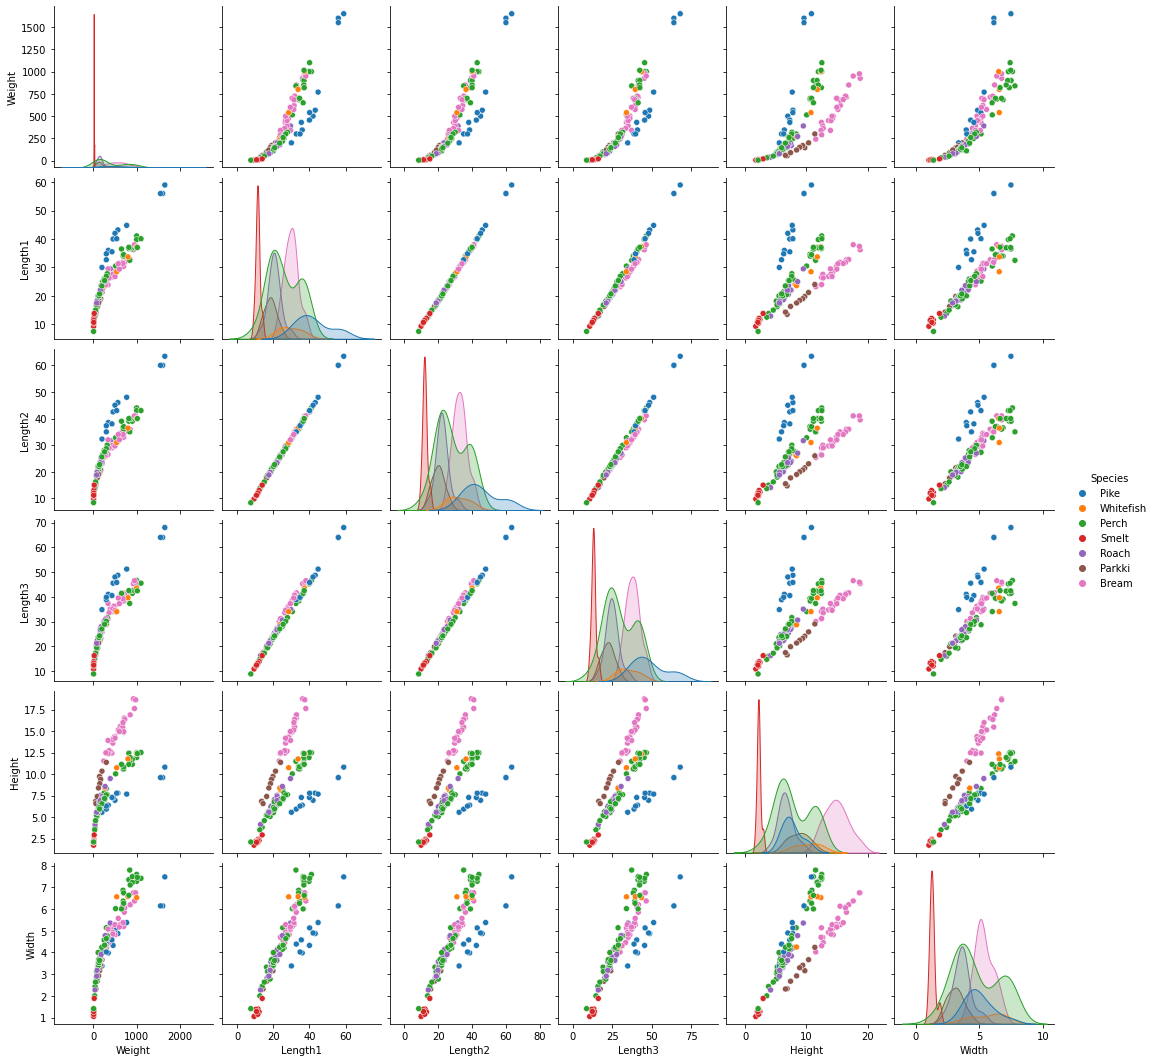

In [25]:
sns.pairplot(df_train, hue = 'Species')

In [26]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

#### Boxplots for outlier visualisation

<AxesSubplot:xlabel='Species', ylabel='Width'>

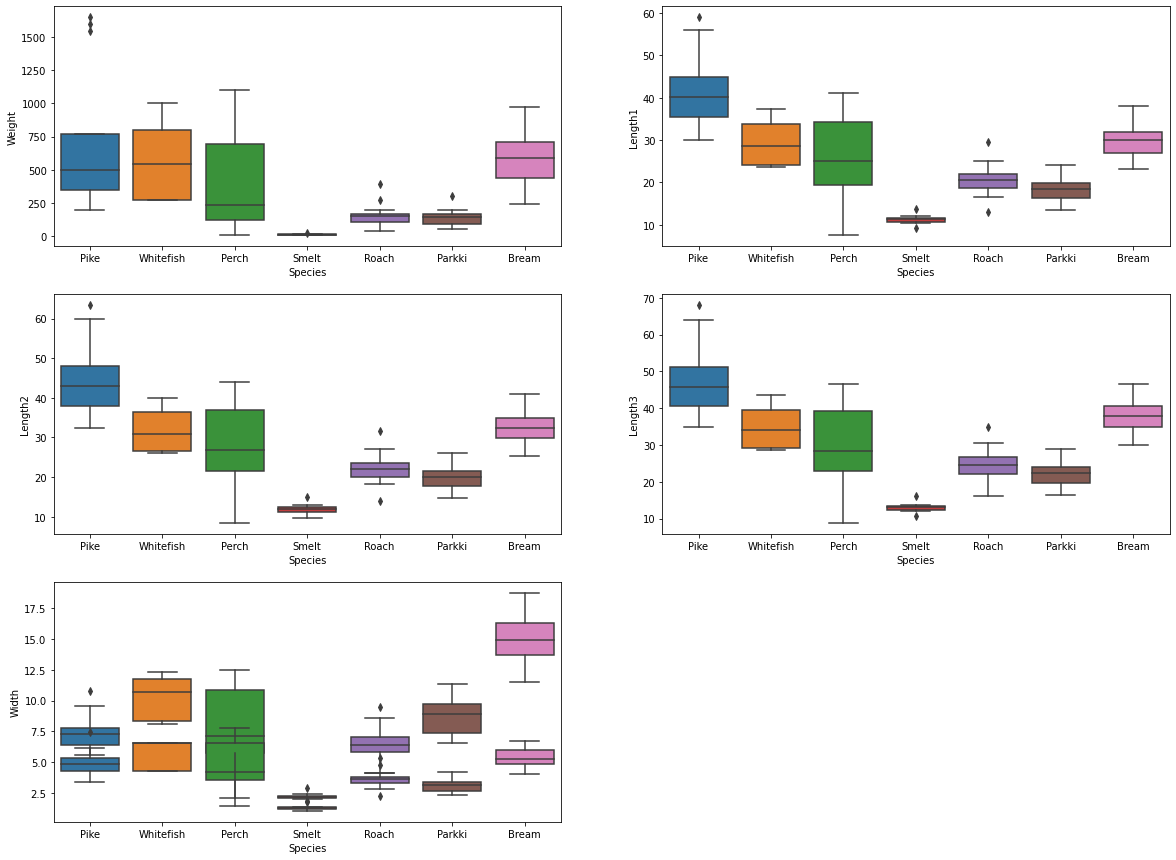

In [27]:
x = df_train['Species']

fig, axes = plt.subplots(3,2, figsize=(20,15))
fig.delaxes(axes[2][1])
sns.boxplot(y=df_train['Weight'], x = x, ax=axes[0][0])
sns.boxplot(y=df_train['Length1'], x = x, ax=axes[0][1])
sns.boxplot(y=df_train['Length2'], x = x, ax=axes[1][0])
sns.boxplot(y=df_train['Length3'], x = x, ax=axes[1][1])
sns.boxplot(y=df_train['Height'], x = x, ax=axes[2][0])
sns.boxplot(y=df_train['Width'], x = x, ax=axes[2][0])

<AxesSubplot:xlabel='Species', ylabel='Weight'>

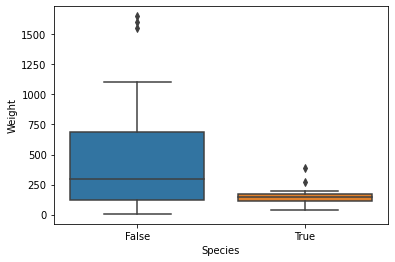

In [28]:
sns.boxplot(y=df_train['Weight'], x = df_train['Species'] == 'Roach')


### Remove further outliers using IQR

In [29]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [30]:
a = set()
for i in df_train.drop('Species', axis = 1).columns:
    lower, higher = outlier_treatment(df_train[i])
    l = df_train.loc[(df_train[i] < lower) | (df_train[i] > higher)].index
    for j in list(l):
        a.add(j)    

In [31]:
a

{142, 143, 144}

3 outliers found beyond 1.5 IQR and dropped from training set

In [32]:
df_train.drop(a, axis = 0, inplace = True)

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Preprocess and Fit

In [33]:
X_train = df_train.drop('Weight', axis = 1)
y_train = df_train['Weight']

X_test = df_test.drop('Weight', axis = 1)
y_test = df_test['Weight']

In [34]:
X_train.shape

(123, 6)

In [35]:
y_train.shape

(123,)

In [36]:
X_train

,Species,Length1,Length2,Length3,Height,Width
138,Pike,43.2,46.0,48.7,7.7920,4.8700
56,Whitefish,24.1,26.5,29.3,8.1454,4.2485
127,Perch,41.1,44.0,46.6,12.4888,7.5958
85,Perch,19.3,21.3,22.8,6.3840,3.5340
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
...,...,...,...,...,...,...
72,Perch,7.5,8.4,8.8,2.1120,1.4080
107,Perch,26.9,28.7,30.1,7.5852,4.6354
14,Bream,29.4,32.0,37.2,14.9544,5.1708
93,Perch,20.7,22.7,24.2,5.9532,3.6300


In [37]:
X_train.columns

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

#### Standard scaling numerical attributes and one hot encoding the categorical attribute - Species

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder()),
    ])

num_attribs = ['Length1', 'Height', 'Width'] # numerical feature attributes
cat_attribs = ['Species'] # categorical feature attributes

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [39]:
X_train_prepared = full_pipeline.fit_transform(X_train) # fit-transformed training set

In [40]:
X_train_prepared.shape 

(123, 10)

In [41]:
X_test_prepared = full_pipeline.transform(X_test) # transformed training set

In [42]:
X_test_prepared.shape

(32, 10)

### Prediction using Linear Regression

In [43]:
k_value = np.arange(1, 11, 1)

In [44]:
k_value

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

#### Using cross-validation

In [46]:
c_list = []
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

lin_reg = LinearRegression()
scores = cross_validate(lin_reg, X_train_prepared, y_train, cv=5,
                     scoring=('r2', 'neg_mean_squared_error'),
                     return_train_score=True)

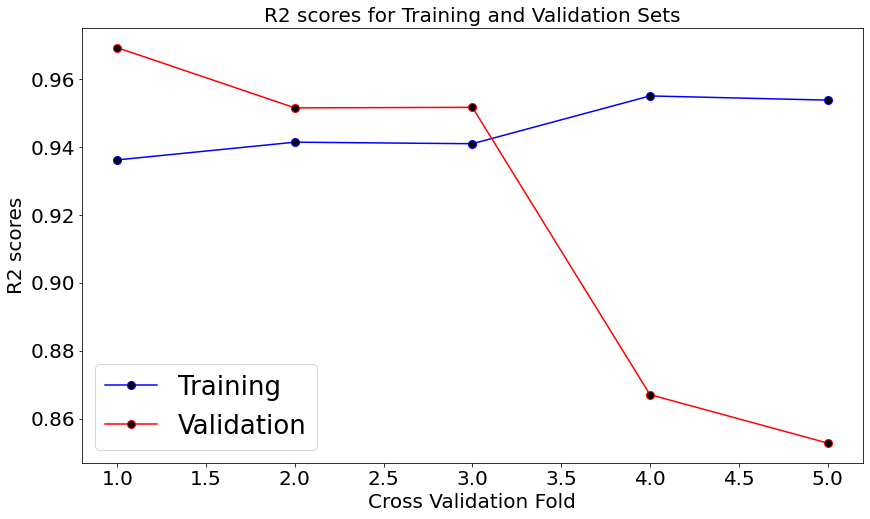

In [48]:
x = np.arange(1, 6, 1)
# k_value = np.arange(1, 13, 1)
y = scores['train_r2']
z = scores['test_r2']

plt.figure(figsize = (14, 8))

plt.plot(x, y, label = "Training",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
plt.plot(x, z, label = "Validation",marker='o', markerfacecolor='Black', markersize=8 , color='red')

plt.title('R2 scores for Training and Validation Sets', fontsize = 20)
plt.xlabel('Cross Validation Fold', fontsize = 20)
plt.ylabel('R2 scores', fontsize = 20)
plt.legend(fontsize = 26)
plt.tick_params(axis='both', labelsize=20)
# plt.ylim(0.90, 1.00)

In [50]:
import statistics
statistics.mean(scores['test_r2'])

0.9184280707176278

## Missing Fish Dataset

In [51]:
df = pd.read_csv("Fish_Missing.csv")

In [52]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555


In [53]:
df.shape

(163, 7)

In [54]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Missing/Null values

In [55]:
df.isnull().sum()

Species     0
Weight      2
Length1     7
Length2    12
Length3    14
Height      6
Width      12
dtype: int64

Dropping duplicates

Number of duplicates

In [56]:
df.duplicated().sum()

3

Dropping the duplcates

In [57]:
df.drop_duplicates(inplace = True)

In [58]:
df.shape

(160, 7)

In [59]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,153.000000,148.000000,146.000000,154.000000,148.000000
mean,399.208228,26.725490,28.518919,31.964384,9.142442,4.557105
std,359.522386,9.962756,10.747044,11.540404,4.227363,1.771885
min,0.000000,7.500000,8.400000,8.800000,1.738800,1.047600
0.5%,4.631500,8.868000,9.429000,10.250000,1.917198,1.121688
1%,6.356000,9.664000,10.129000,11.160000,1.975286,1.153852
5%,9.800000,11.460000,12.070000,13.575000,2.376450,1.284290
10%,28.370000,13.800000,14.910000,16.850000,4.739280,2.308950
25%,120.000000,19.800000,21.000000,23.500000,6.111150,3.531750
50%,272.500000,25.400000,27.150000,30.950000,7.806200,4.335000


In [60]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [61]:
df['Species'].value_counts()

Perch        56
Bream        36
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Dropping the 2 rows where Weight is null as that is the target variable

In [62]:
df.drop(df.loc[df['Weight'].isna()].index, inplace = True)

In [63]:
df.isin([0]).any()

Species    False
Weight      True
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [64]:
df['Weight'].isin([0]).value_counts()

False    157
True       1
Name: Weight, dtype: int64

In [65]:
df.loc[df['Weight'].isin([0])]

,Species,Weight,Length1,Length2,Length3,Height,Width
43,Roach,0.0,19.0,20.5,NaN,6.4752,3.3516


#### Dropping 1 '0' value in Weight attribute

In [72]:
mask1 = df.loc[df['Weight'].isin([0])]
df.drop(mask1.index, axis = 0, inplace = True)

In [73]:
df.shape

(157, 7)

### Outliers using std dev

In [74]:
from scipy import stats

z_scores = stats.zscore(df.drop('Species', axis = 1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

In [75]:
df_new.shape

(0, 7)

No outliers using std deviation

### Train Test Split

In [80]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

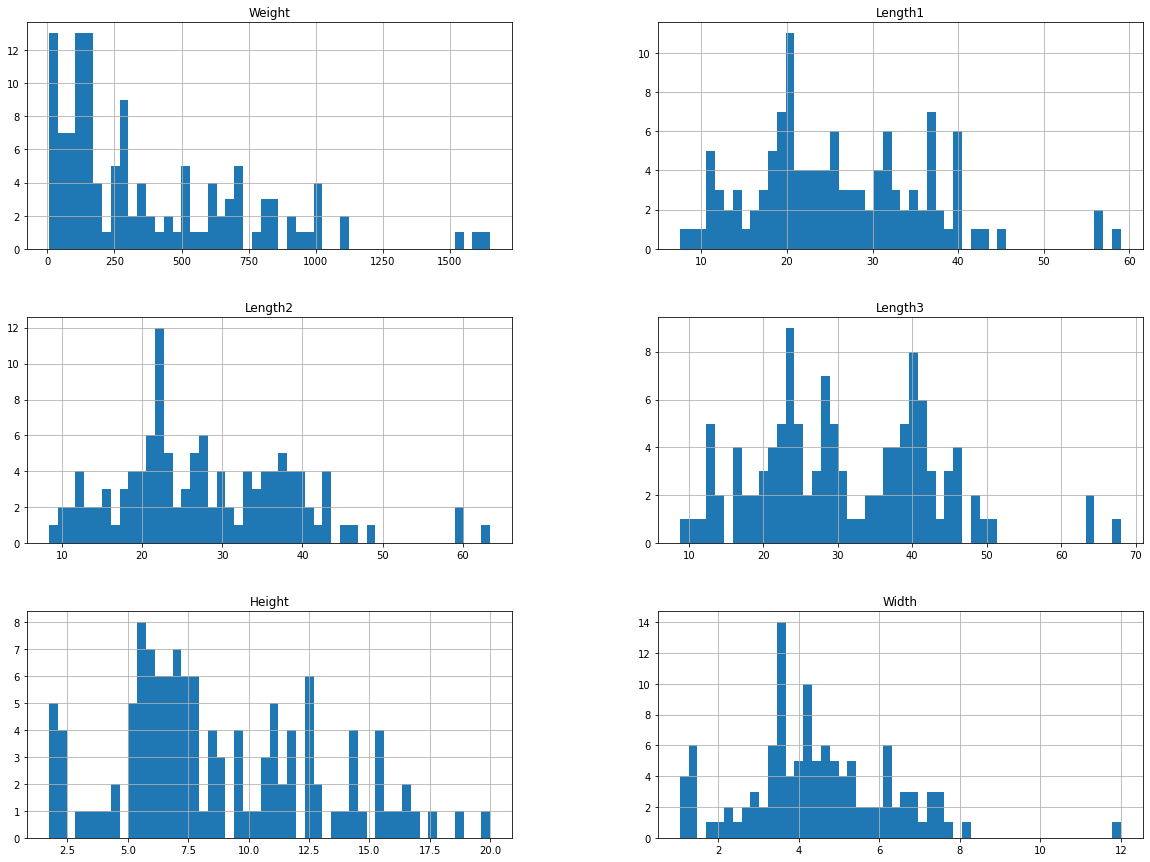

In [81]:
df_train.hist(bins = 50, figsize = (20, 15))
plt.show()

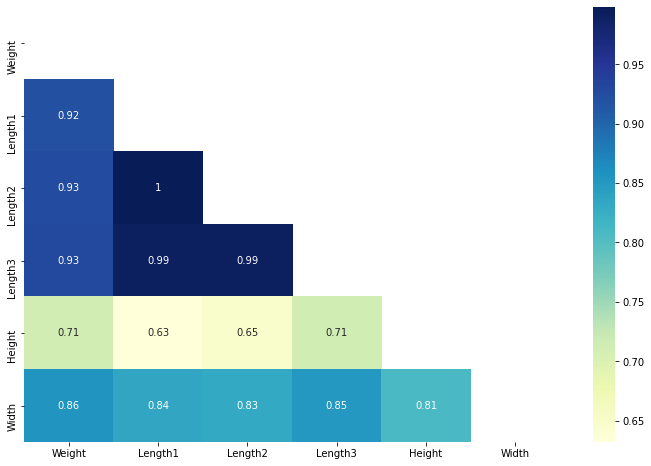

In [82]:
corr_mat = df_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, mask = np.triu(corr_mat), cmap="YlGnBu", annot = True)
plt.show()

#### Length1 is highly correlated to Length2 and Length3 indicating multi-collinearity. We will thus use just Length1 out of the 3 as our feature variable

In [83]:
target = 'Weight'
features = ['Length1', 'Height', 'Width', 'Species']

In [84]:
df_train['Species'].value_counts()

Perch        46
Bream        25
Roach        17
Pike         12
Smelt        11
Parkki        9
Whitefish     5
Name: Species, dtype: int64

#### Species wise distribution

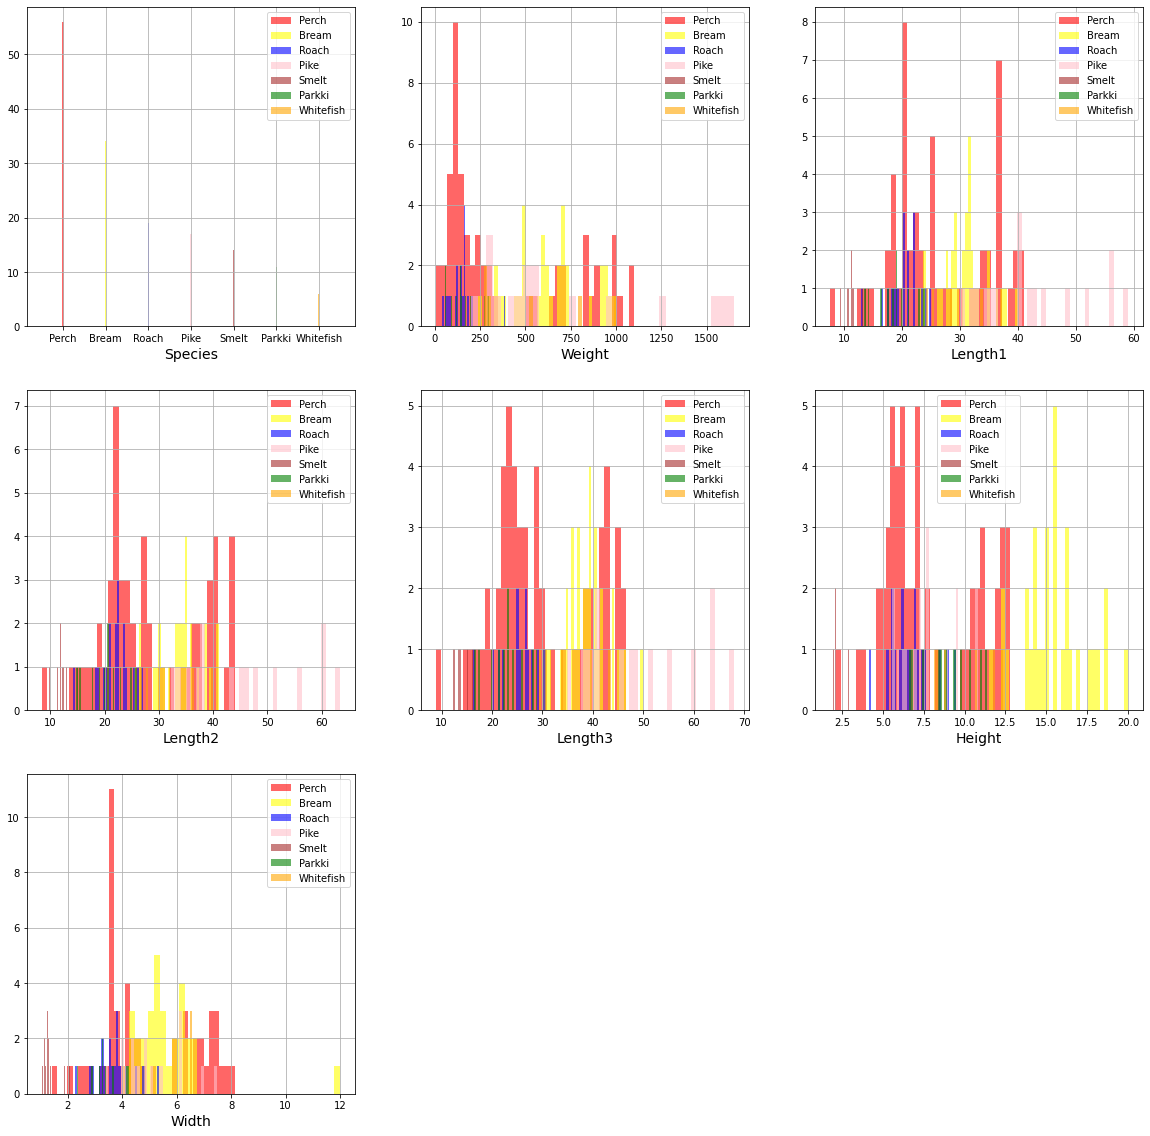

In [85]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df_train, 1):
    plt.subplot(3, 3, i)
    df[df['Species'] == 'Perch'][column].hist(bins=35, color='red', label='Perch', alpha=0.6)
    df[df['Species'] == 'Bream'][column].hist(bins=35, color='yellow', label='Bream', alpha=0.6)
    df[df['Species'] == 'Roach'][column].hist(bins=35, color='blue', label='Roach', alpha=0.6)
    df[df['Species'] == 'Pike'][column].hist(bins=35, color='pink', label='Pike', alpha=0.6)
    df[df['Species'] == 'Smelt'][column].hist(bins=35, color='brown', label='Smelt', alpha=0.6)
    df[df['Species'] == 'Parkki'][column].hist(bins=35, color='green', label='Parkki', alpha=0.6)
    df[df['Species'] == 'Whitefish'][column].hist(bins=35, color='orange', label='Whitefish', alpha=0.6)
    plt.legend()
    plt.xlabel(column, fontsize = 14)
    print()

Null values

<AxesSubplot:>

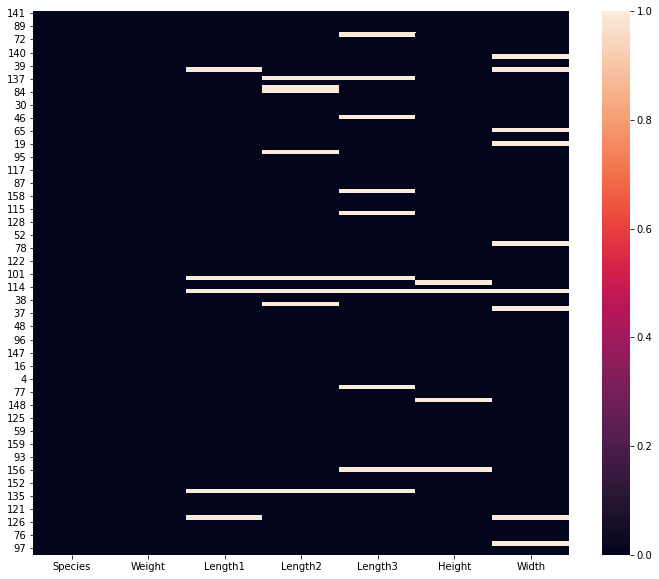

In [86]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_train.isnull())

Pairplots

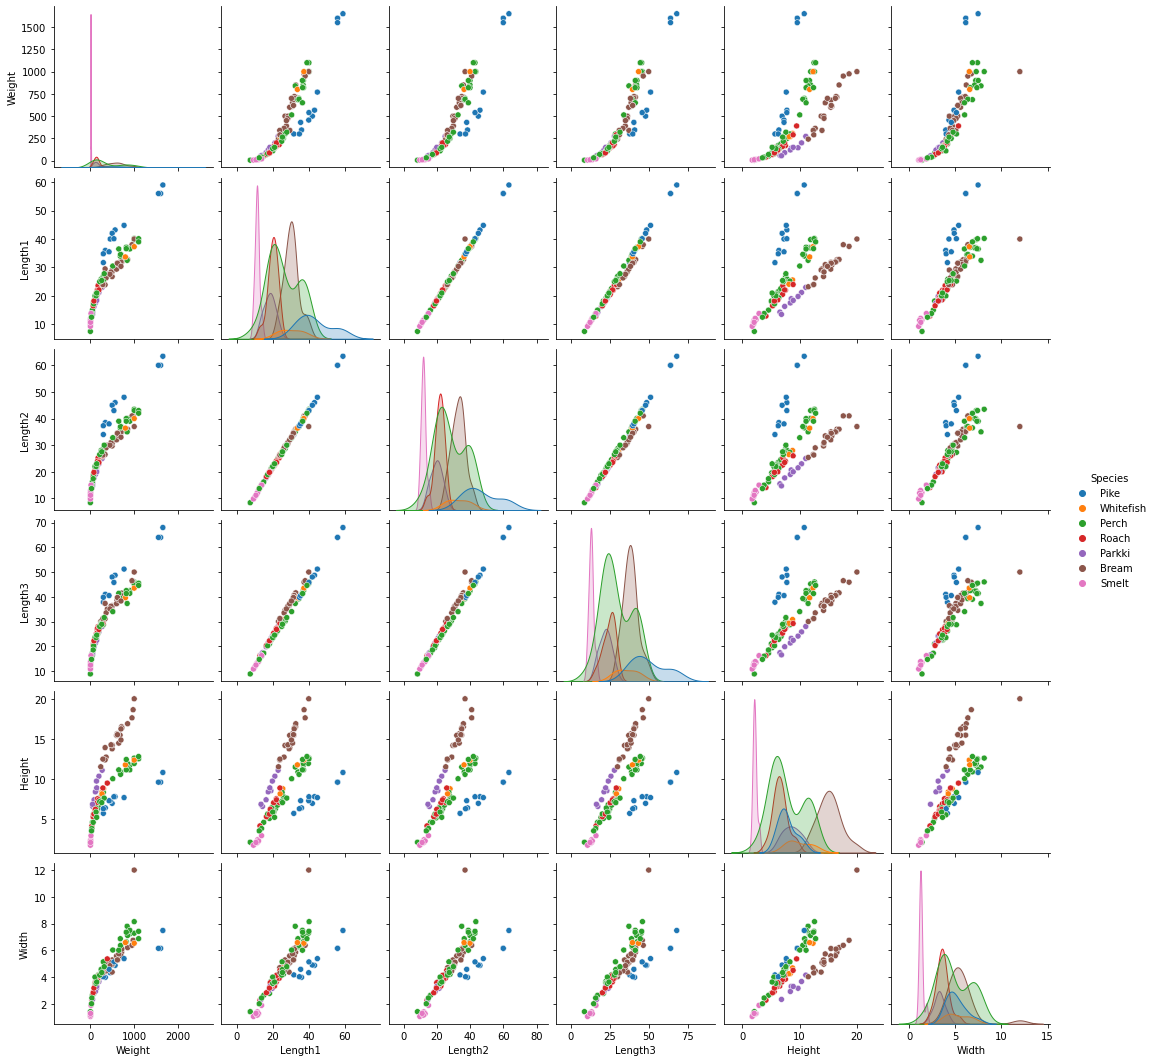

In [87]:
sns.pairplot(df_train, hue = 'Species')

Height and Length pair shows good species wise seperation

In [88]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

<AxesSubplot:xlabel='Species', ylabel='Width'>

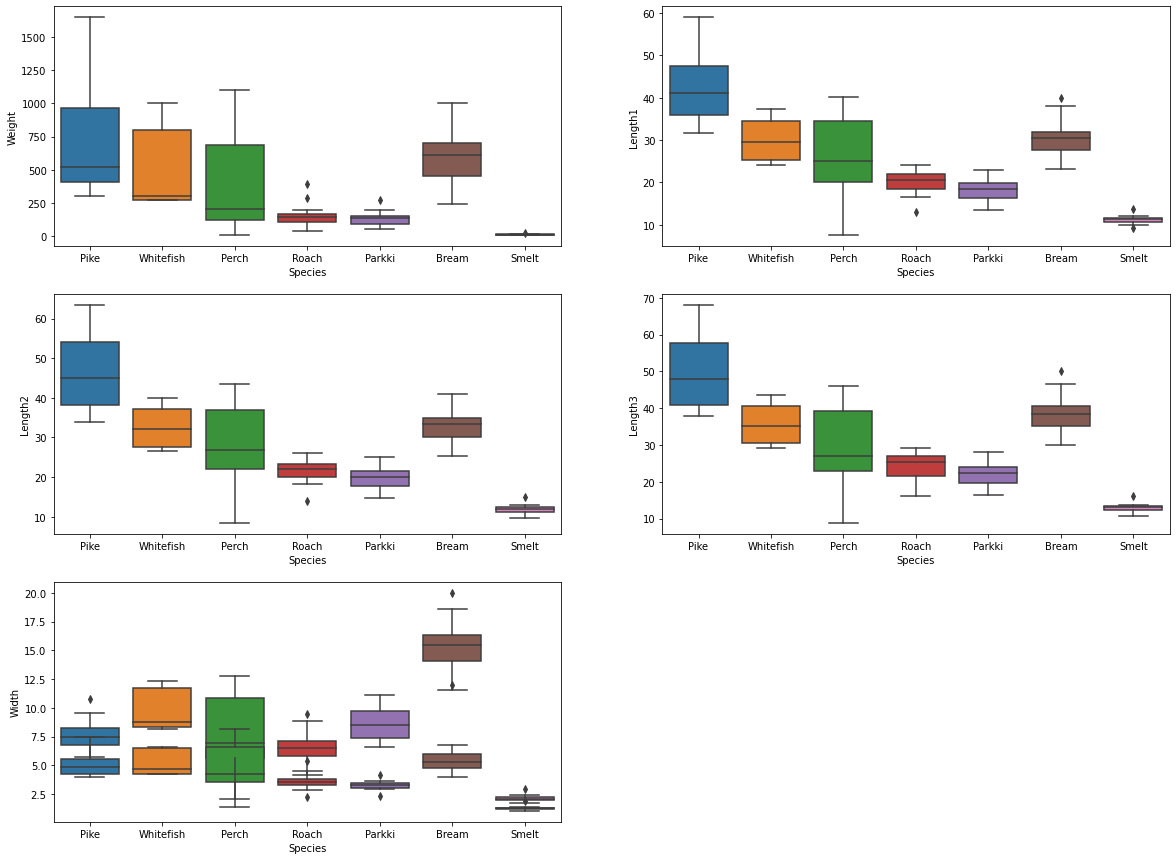

In [89]:
x = df_train['Species']

fig, axes = plt.subplots(3,2, figsize=(20,15))
fig.delaxes(axes[2][1])
sns.boxplot(y=df_train['Weight'], x = x, ax=axes[0][0])
sns.boxplot(y=df_train['Length1'], x = x, ax=axes[0][1])
sns.boxplot(y=df_train['Length2'], x = x, ax=axes[1][0])
sns.boxplot(y=df_train['Length3'], x = x, ax=axes[1][1])
sns.boxplot(y=df_train['Height'], x = x, ax=axes[2][0])
sns.boxplot(y=df_train['Width'], x = x, ax=axes[2][0])

### Outliers using IQR

In [90]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [91]:
a = set()
for i in df_train.drop('Species', axis = 1).columns:
    lower, higher = outlier_treatment(df_train[i])
    l = df_train.loc[(df_train[i] < lower) | (df_train[i] > higher)].index
    for j in list(l):
        a.add(j)    

In [92]:
a

{145, 146, 147}

In [93]:
df_train.drop(a, axis = 0, inplace = True)

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Preprocess and Fit

Weight is the target variable

#### Standard scaling numerical attributes and one hot encoding the categorical attribute - Species, imputing based on species.

In [94]:
list(df['Species'].value_counts().index)

['Perch', 'Bream', 'Roach', 'Pike', 'Smelt', 'Parkki', 'Whitefish']

In [95]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [96]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import statistics

species_list = list(df['Species'].value_counts().index)

def preprocessor_linear_fit(strategy): 
    new_train_df = []
    new_test_df = []
    
    # imputer functions 
    
    def imputer(species, strategy):
        
        if strategy == 'knn':
            imputation = KNNImputer()
        else:
            imputation = SimpleImputer(strategy = strategy)
            
        train = imputation.fit_transform(df_train.drop('Species', axis = 1).loc[df_train['Species'] == species])
        train = pd.DataFrame(train, columns = df_train.drop('Species', axis = 1).columns)
        train['Species'] = [species for _ in range(train.shape[0])]

        test = imputation.transform(df_test.drop('Species', axis = 1).loc[df_test['Species'] == species])
        test = pd.DataFrame(test, columns = df_test.drop('Species', axis = 1).columns)
        test['Species'] = [species for _ in range(test.shape[0])]

        new_train_df.append(train)
        new_test_df.append(test)
        
    for species in species_list:
        imputer(species, strategy)
        
    imputed_train = pd.concat(new_train_df, ignore_index = True)
    imputed_test = pd.concat(new_test_df, ignore_index = True)
    
    # create X_train, y_train and X_test, y_test datasets
    
    X_train = imputed_train.drop('Weight', axis = 1)
    y_train = imputed_train['Weight']

    X_test = imputed_test.drop('Weight', axis = 1)
    y_test = imputed_test['Weight']
    
    # pipeline for data transformation

    num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ])

    cat_pipeline = Pipeline([
        ('one_hot', OneHotEncoder()),
        ])

    num_attribs = ['Length1', 'Height', 'Width']
    cat_attribs = ['Species']

    full_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_attribs),
            ("cat", cat_pipeline, cat_attribs),
        ])
    
    X_train_prepared = full_pipeline.fit_transform(X_train)
    X_test_prepared = full_pipeline.transform(X_test)
    
    # cross validation
    
    c_list = []
    train_r2_scores = []
    test_r2_scores = []
    train_rmse_scores = []
    test_rmse_scores = []

#     for i in k_value:
    lin_reg = LinearRegression()
    scores = cross_validate(lin_reg, X_train_prepared, y_train, cv=5,
                         scoring=('r2', 'neg_mean_squared_error'),
                         return_train_score=True)
    
    # plot result
    
    x = np.arange(1, 6, 1)
    y = scores['train_r2']
    z = scores['test_r2']

    plt.figure(figsize = (14, 8))

    plt.plot(x, y, label = "Training",marker='o', markerfacecolor='Black', markersize=8 , color='blue')
    plt.plot(x, z, label = "Validation",marker='o', markerfacecolor='Black', markersize=8 , color='red')
    plt.title('R2 scores for Training and Validation Sets, Imputation Strategy: {}'.format(strategy), fontsize = 20)
    plt.xlabel('Cross Validation Fold', fontsize = 20)
    plt.ylabel('R2 scores', fontsize = 20)
    plt.legend(fontsize = 26)
    plt.tick_params(axis='both', labelsize=20)
    plt.show()
    # plt.ylim(0.90, 1.00)
    
    print("R2 score for the model: {}".format(round(statistics.mean(scores['test_r2']), 2)))

#### Mean Imputation

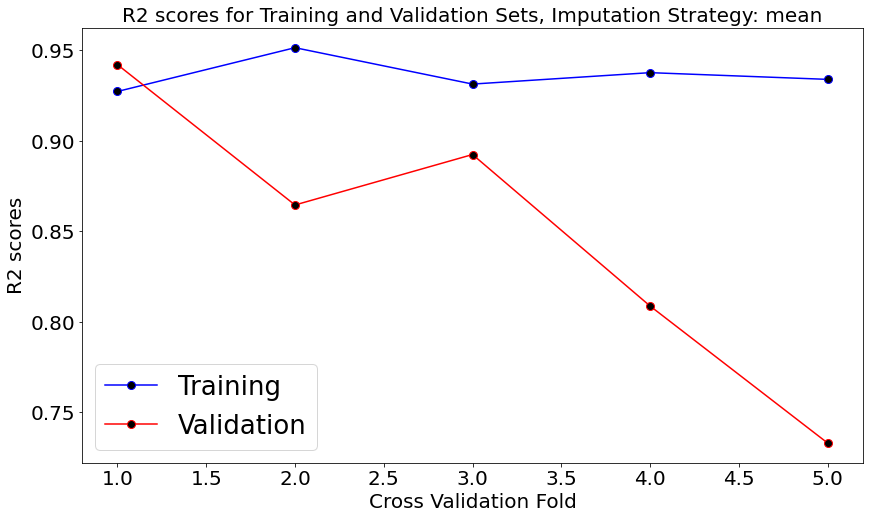

R2 score for the model: 0.85


In [97]:
preprocessor_linear_fit('mean')

In [98]:
scores['test_r2']

array([0.96919719, 0.95147919, 0.95163299, 0.86704139, 0.85278959])

In [99]:
scores['train_r2']

array([0.93616069, 0.9413741 , 0.94091824, 0.95498882, 0.95376051])

#### Median Imputation

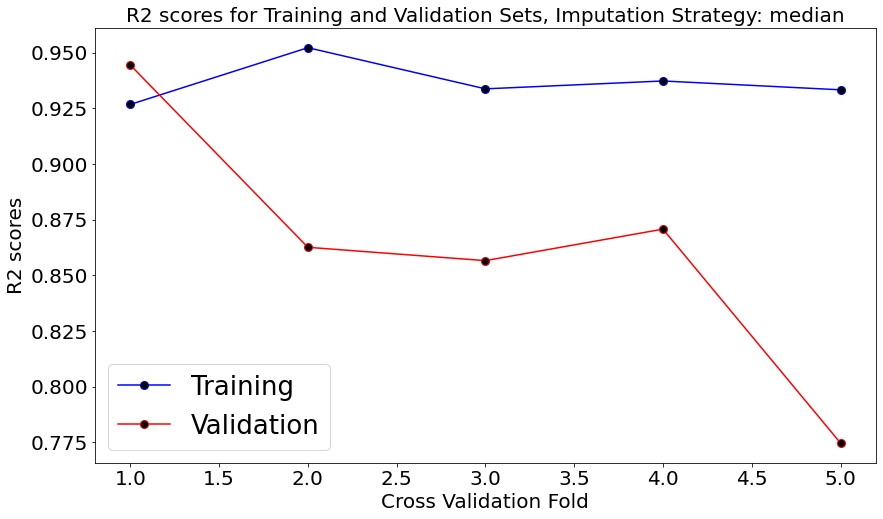

R2 score for the model: 0.86


In [100]:
preprocessor_linear_fit('median')

In [101]:
scores['test_r2']

array([0.96919719, 0.95147919, 0.95163299, 0.86704139, 0.85278959])

In [102]:
scores['train_r2']

array([0.93616069, 0.9413741 , 0.94091824, 0.95498882, 0.95376051])

#### KNN Imputation

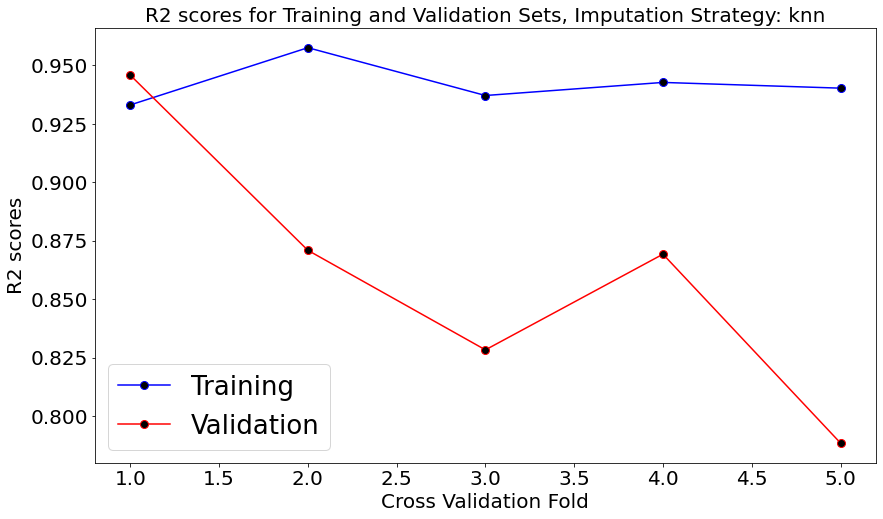

R2 score for the model: 0.86


In [103]:
preprocessor_linear_fit('knn')

In [104]:
scores['test_r2']

array([0.96919719, 0.95147919, 0.95163299, 0.86704139, 0.85278959])

In [105]:
scores['train_r2']

array([0.93616069, 0.9413741 , 0.94091824, 0.95498882, 0.95376051])

### Comments

1. A proper EDA was done on the dataset.
2. Outliers were removed.
3. Missing values were imputed based on species. 
4. Linear Regression models were fit through cross validation using different imputation stategies such as mean and median for SimpleImputer and KNNImputer was also tried.
5. Median SimpleImputer and KNNImputer gave slightly better results than Mean SimpleImputer.
6. A Stratified Split can be used in cross validation to get even better results.
7. Certain cross validation folds gave poorer results, most likely due to presence of several imbalanced classes in it.
8. Class balancing techniques such as SMOTE could also be tried.